In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from alibi.explainers import ALE, plot_ale, PartialDependence, plot_pd, PartialDependenceVariance

In [3]:
data = load_iris()
feature_names = data.feature_names
target_names = data.target_names
X = data.data
y = data.target
print(feature_names)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

1.0

In [6]:
proba_ale_lr = ALE(lr.predict_proba, feature_names=feature_names, target_names=target_names)
logit_ale_lr = ALE(lr.decision_function, feature_names=feature_names, target_names=target_names)

In [7]:
proba_exp_lr = proba_ale_lr.explain(X_train)
logit_exp_lr=logit_ale_lr.explain(X_test)

array([[<AxesSubplot: xlabel='petal length (cm)', ylabel='ALE'>]],
      dtype=object)

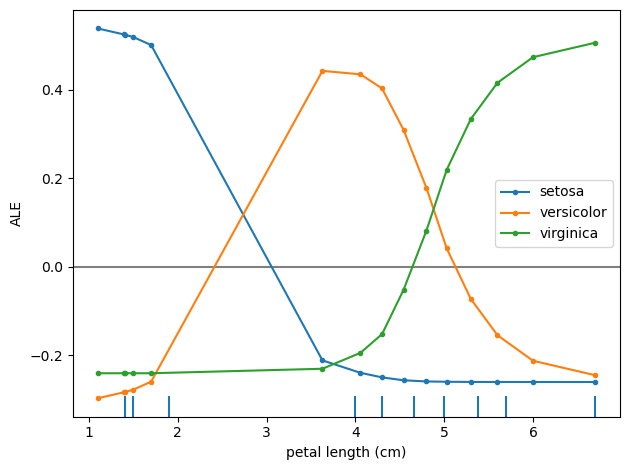

In [8]:
plot_ale(proba_exp_lr, features=[2])

array([[<AxesSubplot: xlabel='petal length (cm)', ylabel='ALE'>]],
      dtype=object)

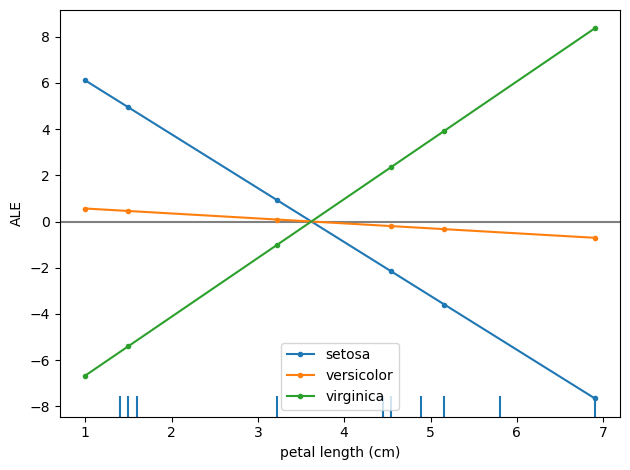

In [9]:
plot_ale(logit_exp_lr,features=[2])

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='ALE'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='ALE'>],
       [<AxesSubplot: xlabel='petal length (cm)', ylabel='ALE'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='ALE'>]],
      dtype=object)

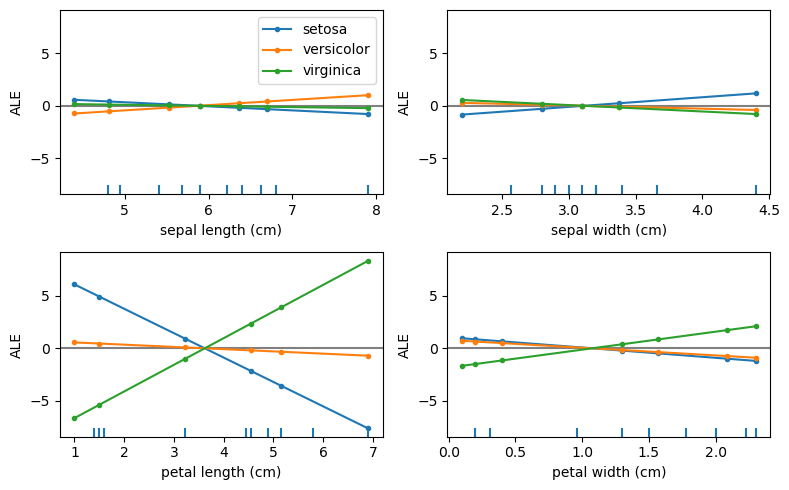

In [10]:
plot_ale(logit_exp_lr, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5})

In [11]:
explainer_pd = PartialDependence(predictor=lr.predict_proba,
feature_names=feature_names,
target_names=target_names)

In [12]:
exp_pd = explainer_pd.explain(X=X_train, kind='average')

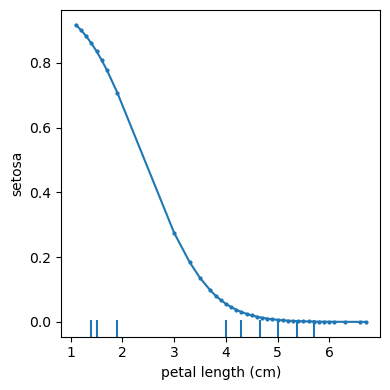

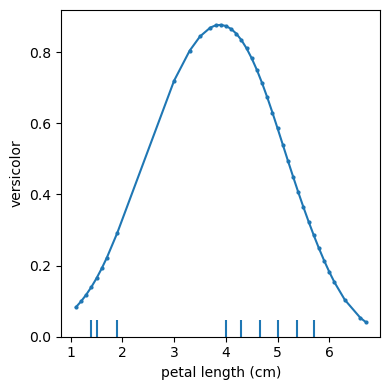

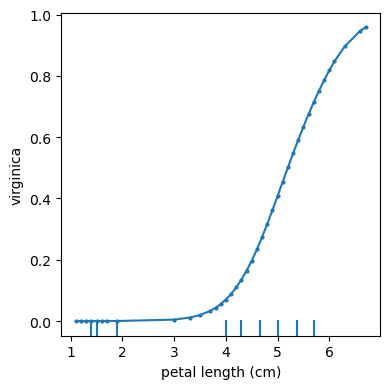

In [13]:
for i in range(3):
    plot_pd(exp=exp_pd,target=i,features=[2],fig_kw={'figheight': 4, 'figwidth': 4});

In [14]:
explainer_pd2 = PartialDependence(predictor=lr.decision_function,
feature_names=feature_names,
target_names=target_names)

In [15]:
exp_pd2 = explainer_pd2.explain(X=X_test, kind='average')

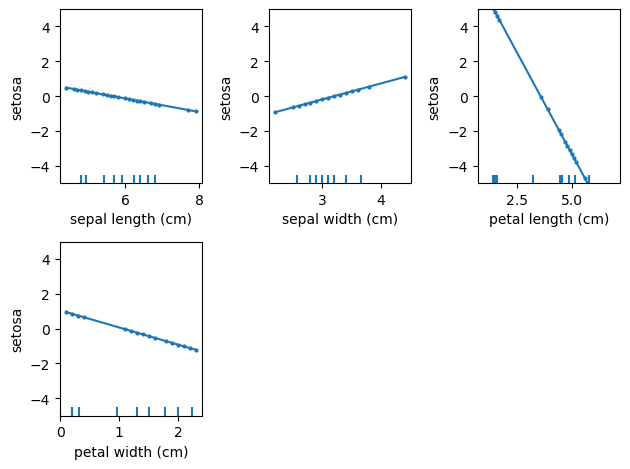

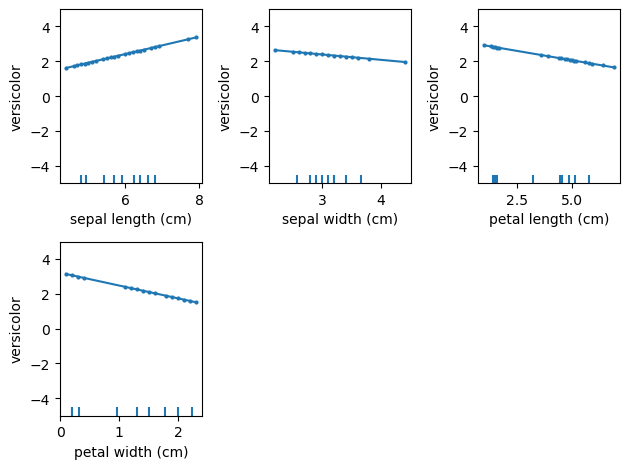

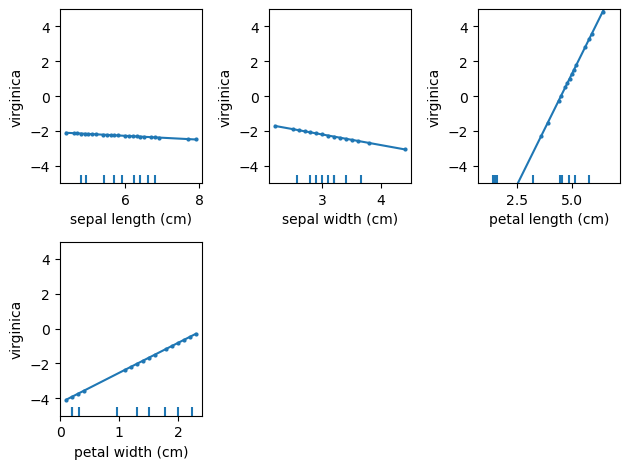

In [16]:
for i in range(3):
    plot_pd(exp=exp_pd2, target=i, pd_limits=[-5.,5,])

In [17]:
pd_variance = PartialDependenceVariance(predictor=lr.predict_proba,
feature_names=feature_names,target_names=target_names)

In [18]:
exp_importance = pd_variance.explain(X=X_train, method='importance')

array([[<AxesSubplot: title={'center': 'setosa'}, xlabel='Feature importance'>,
        <AxesSubplot: title={'center': 'versicolor'}, xlabel='Feature importance'>,
        <AxesSubplot: title={'center': 'virginica'}, xlabel='Feature importance'>]],
      dtype=object)

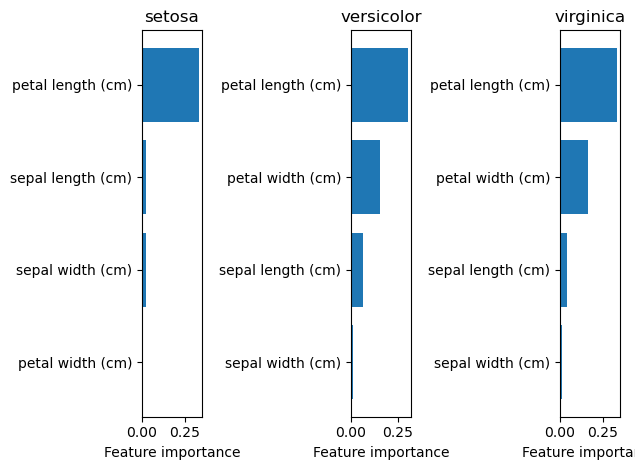

In [19]:
from alibi.explainers import plot_pd_variance
plot_pd_variance(exp=exp_importance,targets=[0,1,2])

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
#from xgboost import XGBClassifier 

In [23]:
gb =  GradientBoostingClassifier()
gb.fit(X_train, y_train)
accuracy_score(y_test, gb.predict(X_test))

1.0

In [24]:
logit_ale_gb = ALE(gb.decision_function, feature_names=feature_names, target_names=target_names)
proba_ale_gb = ALE(gb.predict_proba, feature_names=feature_names, target_names=target_names)

In [25]:
logit_exp_gb = logit_ale_gb.explain(X_train)
proba_exp_gb = proba_ale_gb.explain(X_train)

array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='ALE'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='ALE'>],
       [<AxesSubplot: xlabel='petal length (cm)', ylabel='ALE'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='ALE'>]],
      dtype=object)

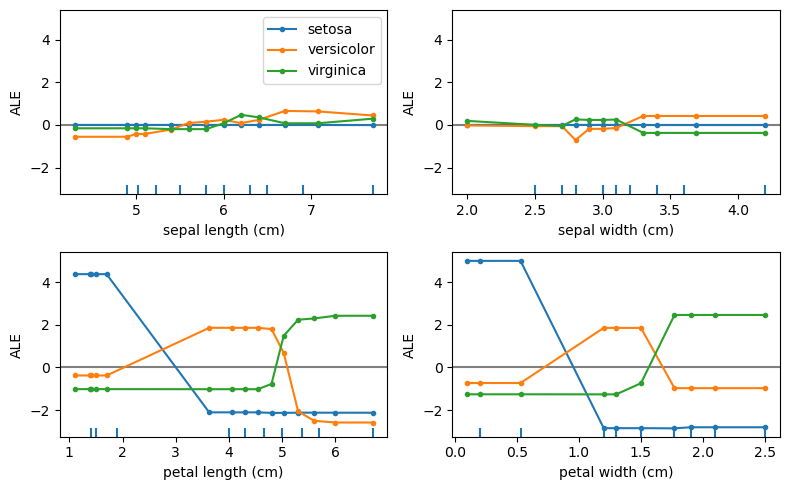

In [26]:
plot_ale(logit_exp_gb, n_cols=2, fig_kw={'figwidth': 8, 'figheight': 5})

 suggests that the features petal length and petal width
are more discriminative for the task. Checking the feature importances of the classifier confirms this:

In [60]:
gb.feature_importances_

array([0.00220374, 0.0164499 , 0.57659043, 0.40475594])

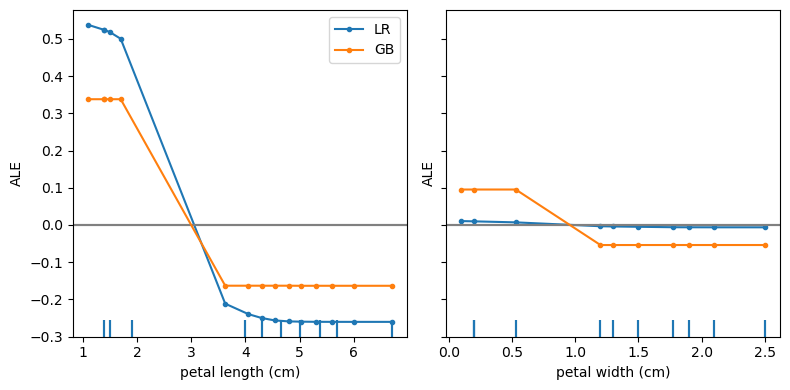

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='row')
plot_ale(proba_exp_lr, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'LR'});
plot_ale(proba_exp_gb, features=[2, 3], targets=['setosa'], ax=ax, line_kw={'label': 'GB'});

In [62]:
logit_pd_gb = PartialDependence(gb.decision_function, feature_names=feature_names, target_names=target_names)
proba_pd_gb = PartialDependence(gb.predict_proba, feature_names=feature_names, target_names=target_names)

In [63]:
logit_pd_exp_gb = logit_pd_gb.explain(X_train)
proba_pd_exp_gb = proba_pd_gb.explain(X_train)

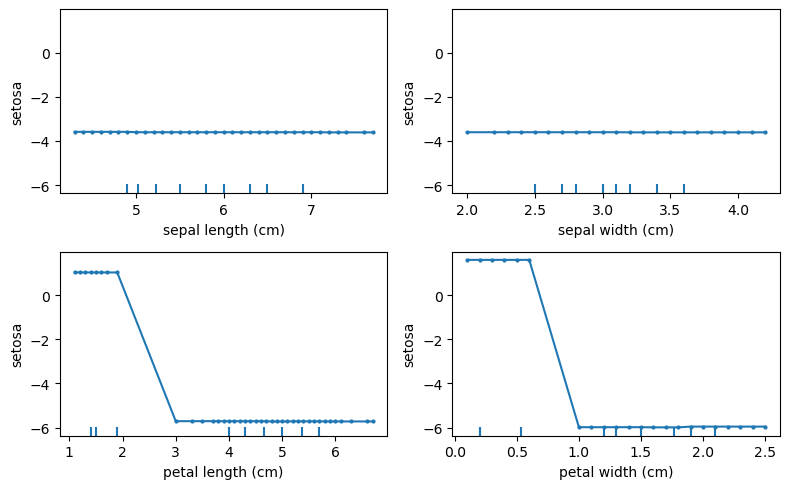

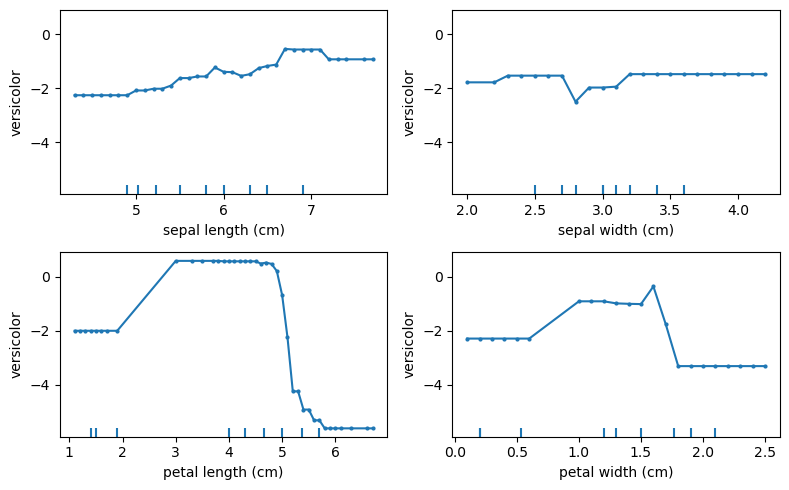

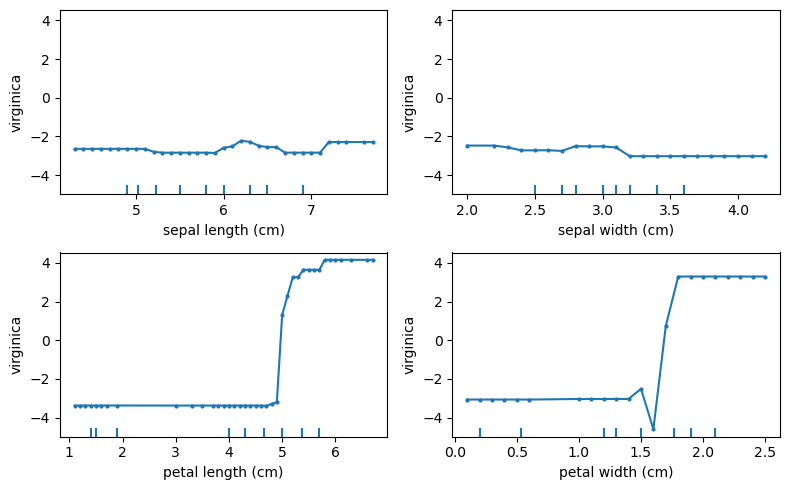

In [64]:
for i in range(3):
    plot_pd(logit_pd_exp_gb, n_cols=2,target=i, fig_kw={'figwidth': 8, 'figheight': 5})

In [66]:
pdgb_variance = PartialDependenceVariance(predictor=gb.predict_proba,
feature_names=feature_names,target_names=target_names)

In [68]:
exp_gb_importance = pdgb_variance.explain(X=X_train, method='importance')

array([[<AxesSubplot: title={'center': 'setosa'}, xlabel='Feature importance'>,
        <AxesSubplot: title={'center': 'versicolor'}, xlabel='Feature importance'>,
        <AxesSubplot: title={'center': 'virginica'}, xlabel='Feature importance'>]],
      dtype=object)

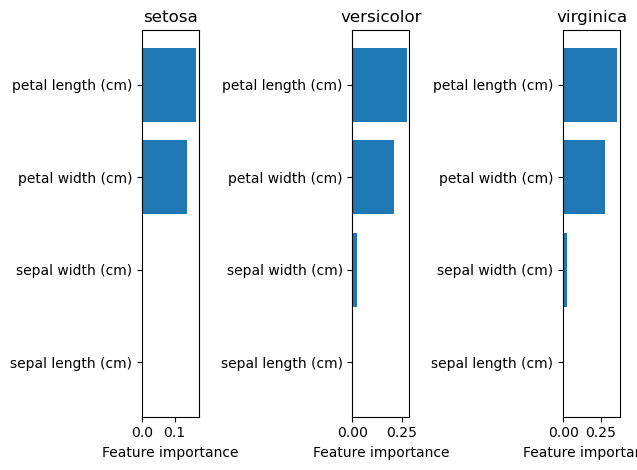

In [69]:
plot_pd_variance(exp=exp_gb_importance,targets=[0,1,2])